In [1]:
import csv
import json
import pandas as pd

In [2]:
csvfile = open('funding_rounds.csv', 'r',encoding='utf8')
jsonfile = open('funding_rounds.json', 'w')

In [3]:
#Conversion du csv en json
fieldnames = ('id', 'funding_round_id', 'object_id', 'funded_at',
       'funding_round_type', 'funding_round_code', 'raised_amount_usd',
       'raised_amount', 'raised_currency_code', 'pre_money_valuation_usd',
       'pre_money_valuation', 'pre_money_currency_code',
       'post_money_valuation_usd', 'post_money_valuation',
       'post_money_currency_code', 'participants', 'is_first_round',
       'is_last_round', 'source_url', 'source_description', 'created_by',
       'created_at', 'updated_at')
reader = csv.DictReader( csvfile, fieldnames)
for row in reader:
    json.dump(row, jsonfile)
    jsonfile.write('\n')

In [4]:
#Première fusion
import pandas as pd

a = pd.read_csv("people.csv", encoding='utf8')
b = pd.read_csv("degrees.csv", encoding='utf8')

In [37]:
a

,id,object_id,first_name,last_name,birthplace,affiliation_name
0,1,p:2,Ben,Elowitz,NaN,Blue Nile
1,2,p:3,Kevin,Flaherty,NaN,Wetpaint
2,3,p:4,Raju,Vegesna,NaN,Zoho
3,4,p:5,Ian,Wenig,NaN,Zoho
4,5,p:6,Kevin,Rose,"Redding, CA",i/o Ventures
...,...,...,...,...,...,...
226704,226705,p:268589,John,Pins,NaN,Unaffiliated
226705,226706,p:268590,David,Schulhof,NaN,Unaffiliated
226706,226707,p:268592,Matthew,D. Rosen,NaN,Unaffiliated
226707,226708,p:268593,Gordon,Hutchins,NaN,Unaffiliated


In [5]:
#Clean on ne veut plus de ces id , les dataframe on le leur
b = b.drop(['id'], axis = 1)
b

,object_id,degree_type,subject,institution,graduated_at,created_at,updated_at
0,p:6117,MBA,NaN,NaN,NaN,2008-02-19 03:17:36,2008-02-19 03:17:36
1,p:6136,BA,"English, French","Washington University, St. Louis",1990-01-01,2008-02-19 17:58:31,2008-02-25 00:23:55
2,p:6136,MS,Mass Communication,Boston University,1992-01-01,2008-02-19 17:58:31,2008-02-25 00:23:55
3,p:6005,MS,Internet Technology,University of Greenwich,2006-01-01,2008-02-19 23:40:40,2008-02-25 00:23:55
4,p:5832,BCS,"Computer Science, Psychology",Rice University,NaN,2008-02-20 05:28:09,2008-02-20 05:28:09
...,...,...,...,...,...,...,...
109605,p:268589,CPA,NaN,American Institute of Certtified Public Accoun...,NaN,2013-12-12 14:28:58,2013-12-12 14:28:58
109606,p:268527,MS & BS,Engineering,South China University of Technology,NaN,2013-12-12 14:31:21,2013-12-12 14:31:21
109607,p:268527,PhD,Engineering,Clarkson University,NaN,2013-12-12 14:31:48,2013-12-12 14:31:48
109608,p:268528,B.S.,Electrical Engineering,Colorado State University,NaN,2013-12-12 14:38:15,2013-12-12 14:38:15


In [6]:
a = a.drop(['id'], axis = 1)
a

,object_id,first_name,last_name,birthplace,affiliation_name
0,p:2,Ben,Elowitz,NaN,Blue Nile
1,p:3,Kevin,Flaherty,NaN,Wetpaint
2,p:4,Raju,Vegesna,NaN,Zoho
3,p:5,Ian,Wenig,NaN,Zoho
4,p:6,Kevin,Rose,"Redding, CA",i/o Ventures
...,...,...,...,...,...
226704,p:268589,John,Pins,NaN,Unaffiliated
226705,p:268590,David,Schulhof,NaN,Unaffiliated
226706,p:268592,Matthew,D. Rosen,NaN,Unaffiliated
226707,p:268593,Gordon,Hutchins,NaN,Unaffiliated


In [7]:
#Left merge
merged = a.merge(b, on='object_id', how='left')
merged.to_csv("people_degree.csv", index=False)

In [69]:
merged
# On a perdu environ  : 109610 - 109056 = 550 lignes (ce qui est correct et de toutes façon ce sont des lignes de degree que l'on ne peut pas fusionner avec people, on ne peut les mettres nul part)
#Au final grace a un left join on garde ces 500 lignes et on evite de rajouter manuellement les lignes manquantes de people

,object_id,first_name,last_name,birthplace,affiliation_name,degree_type,subject,institution,graduated_at,created_at,updated_at
0,p:2,Ben,Elowitz,NaN,Blue Nile,BS,Electrical Engineering/Computer Science,"University of California, Berkeley",1994-01-01,2008-05-06 00:05:48,2008-05-06 00:05:48
1,p:2,Ben,Elowitz,NaN,Blue Nile,BS,Applied Mathematics,"University of California, Berkeley",1994-01-01,2008-05-06 00:06:10,2008-05-06 00:06:10
2,p:3,Kevin,Flaherty,NaN,Wetpaint,BBA,NaN,Washington University in St Louis,NaN,2008-05-07 19:40:58,2013-11-21 09:43:38
3,p:3,Kevin,Flaherty,NaN,Wetpaint,MBA,NaN,Indiana University,NaN,2008-05-07 19:41:24,2013-11-21 09:43:38
4,p:4,Raju,Vegesna,NaN,Zoho,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
267689,p:268589,John,Pins,NaN,Unaffiliated,CPA,NaN,American Institute of Certtified Public Accoun...,NaN,2013-12-12 14:28:58,2013-12-12 14:28:58
267690,p:268590,David,Schulhof,NaN,Unaffiliated,NaN,NaN,NaN,NaN,NaN,NaN
267691,p:268592,Matthew,D. Rosen,NaN,Unaffiliated,NaN,NaN,NaN,NaN,NaN,NaN
267692,p:268593,Gordon,Hutchins,NaN,Unaffiliated,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#On passe en csv
merged.to_csv("people_degree.csv", index=False)

In [9]:
#Conversion en json
csvfile = open('people_degree.csv', 'r',encoding='utf8')
jsonfile = open('people_degree.json', 'w')
fieldnames = ("object_id","first_name","last_name","birthplace","affiliation_name","degree_type","subject","institution","graduated_at","created_at","updated_at")
reader = csv.DictReader( csvfile, fieldnames)
for row in reader:
    json.dump(row, jsonfile)
    jsonfile.write('\n')

In [10]:
jsonfile.close()

In [11]:
#Deuxième fusion
import pandas as pd
objet = pd.read_csv("objects.csv", encoding='utf8')
offices = pd.read_csv("offices.csv", encoding='utf8')

c:\users\jdelebec\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (3,7,9,10,17,18,21,22,23,25,26,29,30,37) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [12]:
objet
#pas besoin de clean pour objet

,id,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,founded_at,...,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at
0,c:1,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,2005-10-17,...,2008-05-19,3,39750000.0,2010-09-05,2013-09-18,5,17,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00
1,c:10,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,NaN,...,NaN,0,0.0,NaN,NaN,0,6,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14
2,c:100,Company,100,NaN,There,there,/company/there,games_video,acquired,NaN,...,NaN,0,0.0,2003-02-01,2011-09-23,4,12,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48
3,c:10000,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,2008-07-26,...,NaN,0,0.0,NaN,NaN,0,0,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18
4,c:10001,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,2008-07-26,...,NaN,0,0.0,NaN,NaN,0,0,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462646,r:9995,Product,9995,c:14164,"SiteLink, listing feed for Brokerages",sitelink listing feed for brokerages,/product/sitelink-listing-feed-for-brokerages,NaN,operating,NaN,...,NaN,0,0.0,NaN,NaN,0,0,NaN,2008-11-28 14:34:12,2008-11-28 23:24:22
462647,r:9996,Product,9996,c:14164,"EDCLink, listing feed for Economic Development...",edclink listing feed for economic development ...,/product/edclink-listing-feed-for-economic-dev...,NaN,operating,NaN,...,NaN,0,0.0,NaN,NaN,0,0,NaN,2008-11-28 14:34:13,2008-11-28 23:24:23
462648,r:9997,Product,9997,c:14164,"Cmail, broadcast email marketing",cmail broadcast email marketing,/product/cmail-broadcast-email-marketing,NaN,operating,NaN,...,NaN,0,0.0,NaN,NaN,0,0,NaN,2008-11-28 14:34:13,2008-11-28 23:24:23
462649,r:9998,Product,9998,c:14164,"CatylistCRM, contact database",catylistcrm contact database,/product/catylistcrm-contact-database,NaN,operating,NaN,...,NaN,0,0.0,NaN,NaN,0,0,NaN,2008-11-28 14:34:13,2008-11-28 23:24:23


In [13]:
offices = offices.drop(['id'], axis = 1)
offices

,object_id,office_id,description,region,address1,address2,city,zip_code,state_code,country_code,latitude,longitude,created_at,updated_at
0,c:1,1,NaN,Seattle,710 - 2nd Avenue,Suite 1100,Seattle,98104,WA,USA,47.603122,-122.333253,NaN,NaN
1,c:3,3,Headquarters,SF Bay,4900 Hopyard Rd,Suite 310,Pleasanton,94588,CA,USA,37.692934,-121.904945,NaN,NaN
2,c:4,4,NaN,SF Bay,135 Mississippi St,NaN,San Francisco,94107,CA,USA,37.764726,-122.394523,NaN,NaN
3,c:5,5,Headquarters,SF Bay,1601 Willow Road,NaN,Menlo Park,94025,CA,USA,37.416050,-122.151801,NaN,NaN
4,c:7,7,NaN,SF Bay,Suite 200,654 High Street,Palo Alto,94301,CA,ISR,0.000000,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112713,f:15098,127846,NaN,New York,8 Sound Shore Drive,Suite 303,Greenwich,06830,CT,USA,0.000000,0.000000,NaN,NaN
112714,c:286200,127847,NaN,Santa Barbara,735 State Street,Suite 500,Santa Barbara,93101,CA,USA,0.000000,0.000000,NaN,NaN
112715,c:256895,127848,NaN,Los Angeles,"5777 W. Century Blvd., Suite 360",NaN,Los Angeles,90045,CA,USA,0.000000,0.000000,NaN,NaN
112716,c:256200,127849,NaN,New York,420 LExington Avenue,NaN,New York,10170,NY,USA,0.000000,0.000000,NaN,NaN


In [14]:
merged2 = objet.merge(offices, left_on='id', right_on = 'object_id' ,  how ='left')
merged2.to_csv("object_offices.csv", index=False)

In [15]:
merged2

,id,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,founded_at,...,address1,address2,city_y,zip_code,state_code_y,country_code_y,latitude,longitude,created_at_y,updated_at_y
0,c:1,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,2005-10-17,...,710 - 2nd Avenue,Suite 1100,Seattle,98104,WA,USA,47.603122,-122.333253,NaN,NaN
1,c:1,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,2005-10-17,...,270 Lafayette Street,Suite 505,New York,10012,NY,USA,40.723731,-73.996431,NaN,NaN
2,c:10,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,NaN,...,"8536 National Blvd, Suite A",NaN,Culver City,90232,CA,USA,34.025958,-118.379768,NaN,NaN
3,c:100,Company,100,NaN,There,there,/company/there,games_video,acquired,NaN,...,1855 South Grant Street,3rd Floor,San Mateo,94402,CA,USA,37.553385,-122.302149,NaN,NaN
4,c:10000,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,2008-07-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480321,r:9995,Product,9995,c:14164,"SiteLink, listing feed for Brokerages",sitelink listing feed for brokerages,/product/sitelink-listing-feed-for-brokerages,NaN,operating,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
480322,r:9996,Product,9996,c:14164,"EDCLink, listing feed for Economic Development...",edclink listing feed for economic development ...,/product/edclink-listing-feed-for-economic-dev...,NaN,operating,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
480323,r:9997,Product,9997,c:14164,"Cmail, broadcast email marketing",cmail broadcast email marketing,/product/cmail-broadcast-email-marketing,NaN,operating,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
480324,r:9998,Product,9998,c:14164,"CatylistCRM, contact database",catylistcrm contact database,/product/catylistcrm-contact-database,NaN,operating,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
merged2.shape

(480326, 54)

In [17]:
#On remarque qu'il y a trop de colonnes et certains noms de colonnes ne sont pas trés significatif (description_x)
merged2.columns

Index(['id', 'entity_type', 'entity_id', 'parent_id', 'name',
       'normalized_name', 'permalink', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'homepage_url', 'twitter_username', 'logo_url',
       'logo_width', 'logo_height', 'short_description', 'description_x',
       'overview', 'tag_list', 'country_code_x', 'state_code_x', 'city_x',
       'region_x', 'first_investment_at', 'last_investment_at',
       'investment_rounds', 'invested_companies', 'first_funding_at',
       'last_funding_at', 'funding_rounds', 'funding_total_usd',
       'first_milestone_at', 'last_milestone_at', 'milestones',
       'relationships', 'created_by', 'created_at_x', 'updated_at_x',
       'object_id', 'office_id', 'description_y', 'region_y', 'address1',
       'address2', 'city_y', 'zip_code', 'state_code_y', 'country_code_y',
       'latitude', 'longitude', 'created_at_y', 'updated_at_y'],
      dtype='object')

In [22]:
#On renomme les colonnes ayant un nom avec x ou y
merged2.rename(columns={"country_code_x": "country_code_object", "state_code_x": "state_code_object","city_x": "city_object", "region_x": "region_object", "description_x": "description_object", "description_y" : "description_offices", "region_y" : "region_offices", "city_y" : "city_offices" , "state_code_y" : "state_code_offices", "country_code_y" : "country_code_offices"},inplace=True)
merged2

,id,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,founded_at,...,address1,address2,city_offices,zip_code,state_code_offices,country_code_offices,latitude,longitude,created_at_offices,updated_at_offices
0,c:1,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,2005-10-17,...,710 - 2nd Avenue,Suite 1100,Seattle,98104,WA,USA,47.603122,-122.333253,NaN,NaN
1,c:1,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,2005-10-17,...,270 Lafayette Street,Suite 505,New York,10012,NY,USA,40.723731,-73.996431,NaN,NaN
2,c:10,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,NaN,...,"8536 National Blvd, Suite A",NaN,Culver City,90232,CA,USA,34.025958,-118.379768,NaN,NaN
3,c:100,Company,100,NaN,There,there,/company/there,games_video,acquired,NaN,...,1855 South Grant Street,3rd Floor,San Mateo,94402,CA,USA,37.553385,-122.302149,NaN,NaN
4,c:10000,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,2008-07-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480321,r:9995,Product,9995,c:14164,"SiteLink, listing feed for Brokerages",sitelink listing feed for brokerages,/product/sitelink-listing-feed-for-brokerages,NaN,operating,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
480322,r:9996,Product,9996,c:14164,"EDCLink, listing feed for Economic Development...",edclink listing feed for economic development ...,/product/edclink-listing-feed-for-economic-dev...,NaN,operating,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
480323,r:9997,Product,9997,c:14164,"Cmail, broadcast email marketing",cmail broadcast email marketing,/product/cmail-broadcast-email-marketing,NaN,operating,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
480324,r:9998,Product,9998,c:14164,"CatylistCRM, contact database",catylistcrm contact database,/product/catylistcrm-contact-database,NaN,operating,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
#Suite de renommer les colonnes
merged2.rename(columns={"created_at_x" : "created_at_object" , "updated_at_x" : "updated_at_object" , "created_at_y" : "created_at_offices" , "updated_at_y" : "updated_at_offices"},inplace=True)
merged2


,id,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,founded_at,...,address1,address2,city_offices,zip_code,state_code_offices,country_code_offices,latitude,longitude,created_at_offices,updated_at_offices
0,c:1,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,2005-10-17,...,710 - 2nd Avenue,Suite 1100,Seattle,98104,WA,USA,47.603122,-122.333253,NaN,NaN
1,c:1,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,2005-10-17,...,270 Lafayette Street,Suite 505,New York,10012,NY,USA,40.723731,-73.996431,NaN,NaN
2,c:10,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,NaN,...,"8536 National Blvd, Suite A",NaN,Culver City,90232,CA,USA,34.025958,-118.379768,NaN,NaN
3,c:100,Company,100,NaN,There,there,/company/there,games_video,acquired,NaN,...,1855 South Grant Street,3rd Floor,San Mateo,94402,CA,USA,37.553385,-122.302149,NaN,NaN
4,c:10000,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,2008-07-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480321,r:9995,Product,9995,c:14164,"SiteLink, listing feed for Brokerages",sitelink listing feed for brokerages,/product/sitelink-listing-feed-for-brokerages,NaN,operating,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
480322,r:9996,Product,9996,c:14164,"EDCLink, listing feed for Economic Development...",edclink listing feed for economic development ...,/product/edclink-listing-feed-for-economic-dev...,NaN,operating,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
480323,r:9997,Product,9997,c:14164,"Cmail, broadcast email marketing",cmail broadcast email marketing,/product/cmail-broadcast-email-marketing,NaN,operating,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
480324,r:9998,Product,9998,c:14164,"CatylistCRM, contact database",catylistcrm contact database,/product/catylistcrm-contact-database,NaN,operating,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
#On retire les colonnes en trop
merged2 = merged2.drop(columns=[ 'entity_id', 'parent_id',  'normalized_name', 'permalink', 'category_code', 'founded_at', 'closed_at', 'domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height', 'short_description', 'overview', 'tag_list', 'first_milestone_at', 'last_milestone_at', 'milestones', 'relationships', 'created_by', 'created_at_object', 'updated_at_object',  'object_id', 'office_id', 'created_at_offices', 'updated_at_offices'])

In [24]:
merged2
#Resultat : 27 colonnes

,id,entity_type,name,status,description_object,country_code_object,state_code_object,city_object,region_object,first_investment_at,...,description_offices,region_offices,address1,address2,city_offices,zip_code,state_code_offices,country_code_offices,latitude,longitude
0,c:1,Company,Wetpaint,operating,Technology Platform Company,USA,WA,Seattle,Seattle,NaN,...,NaN,Seattle,710 - 2nd Avenue,Suite 1100,Seattle,98104,WA,USA,47.603122,-122.333253
1,c:1,Company,Wetpaint,operating,Technology Platform Company,USA,WA,Seattle,Seattle,NaN,...,NaN,New York,270 Lafayette Street,Suite 505,New York,10012,NY,USA,40.723731,-73.996431
2,c:10,Company,Flektor,acquired,NaN,USA,CA,Culver City,Los Angeles,NaN,...,NaN,Los Angeles,"8536 National Blvd, Suite A",NaN,Culver City,90232,CA,USA,34.025958,-118.379768
3,c:100,Company,There,acquired,NaN,USA,CA,San Mateo,SF Bay,NaN,...,NaN,SF Bay,1855 South Grant Street,3rd Floor,San Mateo,94402,CA,USA,37.553385,-122.302149
4,c:10000,Company,MYWEBBO,operating,NaN,NaN,NaN,NaN,unknown,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480321,r:9995,Product,"SiteLink, listing feed for Brokerages",operating,NaN,NaN,NaN,NaN,unknown,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
480322,r:9996,Product,"EDCLink, listing feed for Economic Development...",operating,NaN,NaN,NaN,NaN,unknown,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
480323,r:9997,Product,"Cmail, broadcast email marketing",operating,NaN,NaN,NaN,NaN,unknown,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
480324,r:9998,Product,"CatylistCRM, contact database",operating,NaN,NaN,NaN,NaN,unknown,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
#merged2.to_csv("object_offices.csv", index=False)
csvfile = open('object_offices.csv', 'r',encoding='utf8')
jsonfile = open('object_office.json', 'w')
fieldnames = ("id","entity_type","name","status","description_object","country_code_object","state_code_object","city_object","region_object","first_investment_at","last_investment_at","investment_rounds","invested_companies","first_funding_at","last_funding_at","funding_rounds","funding_total_usd","description_offices","region_offices","address1","address2","city_offices","zip_code","state_code_offices","country_code_offices","latitude","longitude")
reader = csv.DictReader( csvfile, fieldnames)
for row in reader:
    json.dump(row, jsonfile)
    jsonfile.write('\n')

In [35]:
jsonfile.close()

In [81]:
#Courbe de vizualisation pour les performances
data = {
        'Avec 2 shard':  [1,2,3,4,5,6],
        'Avec 4 shard':  [1,2,3,4,5,6],
        'Avec 6 shard':  [1,2,3,4,5,6],
        'Avec 8 shard':  [1,2,3,4,5,6]
        }

In [84]:
df_perf = pd.DataFrame (data, columns = ['Avec 2 shard','Avec 4 shard','Avec 6 shard','Avec 8 shard'])
df_perf

,Avec 2 shard,Avec 4 shard,Avec 6 shard,Avec 8 shard
0,1,1,1,1
1,2,2,2,2
2,3,3,3,3
3,4,4,4,4
4,5,5,5,5
5,6,6,6,6


In [92]:
df_perf["Avec 2 shard"] = [158.1,385.1,22406.7,14044.2,316,637.9]

In [ ]:
df_perf["Avec 4 shard"] = [158.1,385.1,22406.7,11235.4,316,637.9]

In [93]:
df_perf

,Avec 2 shard,Avec 4 shard,Avec 6 shard,Avec 8 shard
0,158.1,1,1,1
1,385.1,2,2,2
2,22406.7,3,3,3
3,14044.2,4,4,4
4,316.0,5,5,5
5,637.9,6,6,6


c:\users\jdelebec\appdata\local\programs\python\python38-32\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


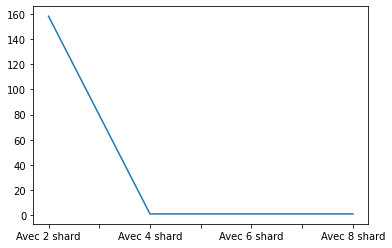

In [89]:
import matplotlib.pyplot as plt
row = df_perf.iloc[0]
row.plot()
plt.show()

c:\users\jdelebec\appdata\local\programs\python\python38-32\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


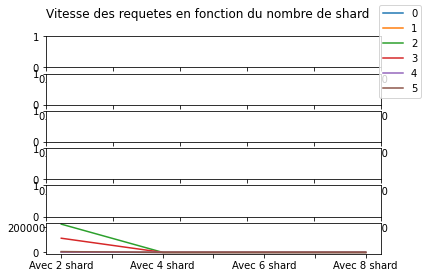

In [90]:
fig, axs = plt.subplots(6)
fig.suptitle('Vitesse des requetes en fonction du nombre de shard')
df_perf.iloc[0].plot()
df_perf.iloc[1].plot()
df_perf.iloc[2].plot()
df_perf.iloc[3].plot()
df_perf.iloc[4].plot()
df_perf.iloc[5].plot()
fig.legend()
#Pour des soucis d'échelle ce plot est non-pertinent

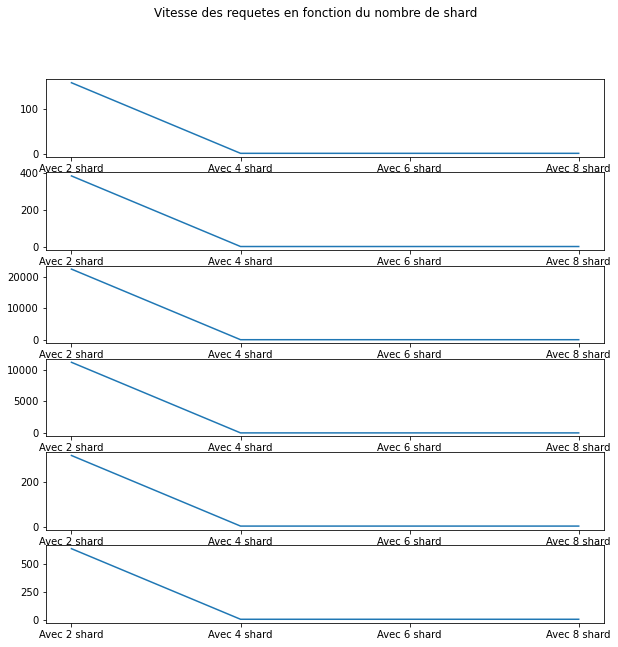

In [91]:
fig, axs = plt.subplots(6,figsize=(10, 10))
fig.suptitle('Vitesse des requetes en fonction du nombre de shard')
axs[0].plot(df_perf.iloc[0],)
axs[1].plot(df_perf.iloc[1])
axs[2].plot(df_perf.iloc[2])
axs[3].plot(df_perf.iloc[3])
axs[4].plot(df_perf.iloc[4])
axs[5].plot(df_perf.iloc[5])
